In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns






In [3]:
# Load and combine data from both CSV files
tc_stream_path1 = "../cons_prod/output/data_for_P2_v2.csv"
tc_stream_path2 = "../cons_prod/output/data_for_P2.csv"

# Read both files
df_tc_stream_v2 = pd.read_csv(tc_stream_path1, parse_dates=["time"])
df_tc_stream_original = pd.read_csv(tc_stream_path2, parse_dates=["time"])

# Concatenate the dataframes
df_tc_stream_combined = pd.concat([df_tc_stream_v2, df_tc_stream_original], ignore_index=True)

# Remove duplicates based on the 'time' column
df_tc_stream_combined = df_tc_stream_combined.drop_duplicates(subset=['time'], keep='first')

# Sort by time
df_tc_stream_combined = df_tc_stream_combined.sort_values('time')

# Reset index
df_tc_stream_combined = df_tc_stream_combined.reset_index(drop=True)

print(f"Original data sizes: {len(df_tc_stream_v2)} rows and {len(df_tc_stream_original)} rows")
print(f"Combined data after removing duplicates: {len(df_tc_stream_combined)} rows")

# Use the combined dataframe for further processing
df_tc_stream = df_tc_stream_combined


Original data sizes: 40900 rows and 30896 rows
Combined data after removing duplicates: 65916 rows


AttributeError: module 'pandas' has no attribute 'write_csv'

In [5]:
# Use DataFrame's to_csv method to write the dataframe to a CSV file
df_tc_stream.to_csv("../cons_prod/output/concat_data_for_P2.csv", index=False)



#### Load data

In [6]:

tc_streamRECORDS_PATH = "../cons_prod/output/concat_data_for_P2.csv"  # 45 000 rows


# ---------- 1.  Read the two files ----------
df_tc_stream  = pd.read_csv(tc_streamRECORDS_PATH,        # 45 000 rows
                    parse_dates=["time"])               # column name is 'time'


#data loading
df_meteo_temp = pd.read_csv(r"..\data\sarze_5\teplota\gw1100a_outdoor_temperature.csv",  # outdoor sensor
                    parse_dates=["time"],index_col=False)

only_part = False


if only_part:

    start_date = '2025-04-13'
    end_date = '2025-04-15'


    df_meteo_temp = df_meteo_temp[(df_meteo_temp['time'] >= start_date) & (df_meteo_temp['time'] <= end_date)].copy()
    df_meteo_temp = df_meteo_temp.reset_index(drop=True)  
    
    df_tc_stream =  pd.read_csv(tc_streamRECORDS_PATH,       
                    parse_dates=["time"])   


#### align time range

In [12]:
#print(df_tc_stream.head())
print(df_meteo_temp.tail())

                     time  value
14763 2025-05-02 18:01:50   23.9
14764 2025-05-02 18:04:49   23.8
14765 2025-05-02 18:09:49   23.7
14766 2025-05-02 18:12:52   23.6
14767 2025-05-02 18:15:49   23.4


last time 2025-05-02 23:58:13
first time 2025-03-04 07:28:31
last time meteo 2025-05-02 18:15:49
first time meteo 2025-03-04 00:01:57
Number of rows in df_meteo_temp with time before last_time: 14703
Total rows in df_tc_stream: 65916
Percentage of data processed: 448.32%
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14703 entries, 65 to 14767
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    14703 non-null  datetime64[ns]
 1   value   14703 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 344.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 65916 entries, 0 to 65915
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              65916 non-null  datetime64[ns]
 1   temperature       65916 non-null  float64       
 2   prikon_tc0_rate   65916 non-null  float64      

## Cleaning data z meteo stanice

<AxesSubplot: xlabel='time'>

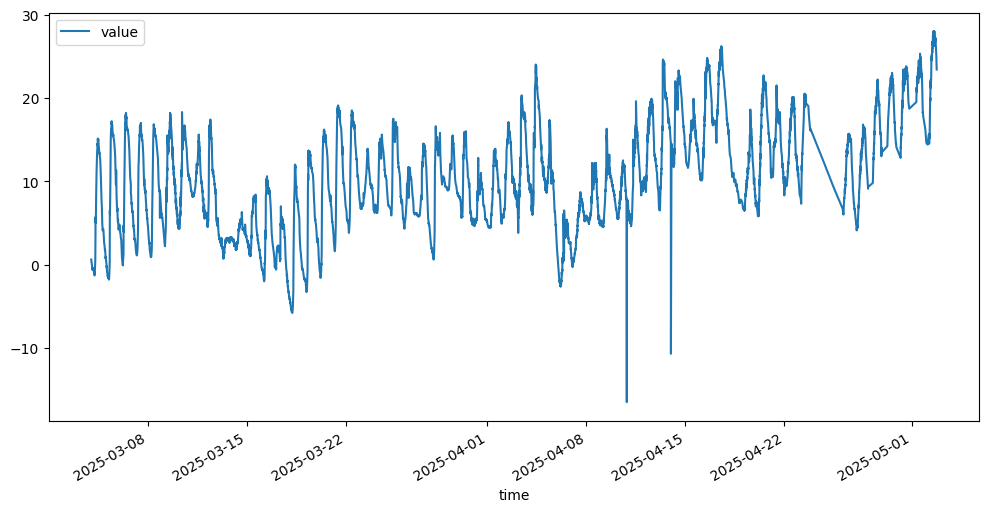

In [15]:



#df.plot(x='time', y='value')          # quick sanity check
df_meteo_temp.plot(y='value', x='time', figsize=(12, 6))  # quick sanity check




In [16]:
print(df_meteo_temp["value"].unique())
print(df_meteo_temp.head(10))
fil_sort_df = df_meteo_temp.sort_values(by='time')
print(fil_sort_df.head(10))

[  0.6   0.5   0.4   0.3   0.2   0.1  -0.1  -0.2  -0.3  -0.4  -0.5  -0.6
  -0.7  -0.8  -0.9  -1.   -1.1  -1.2  -1.3   0.    0.7   0.8   0.9   1.1
   1.7   1.9   2.4   3.6   5.4   5.7   5.6   5.5   5.3   5.    5.1   5.9
   6.3   6.4   6.6   6.7   6.9   7.2   7.7   8.    8.1   8.3   8.8   8.9
   9.4   9.6   9.7   9.9  10.1  10.3  10.4  10.6  10.9  11.1  11.3  11.4
  11.5  11.8  11.9  12.2  12.3  12.7  12.8  13.   13.1  13.3  13.5  13.6
  13.8  14.3  14.4  14.5  14.9  15.   15.1  14.8  14.7  14.6  14.2  14.1
  14.   13.9  13.7  13.4  13.2  12.5  12.4  12.1  12.   11.6  11.2  11.
  10.5  10.2   9.8   9.5   9.1   9.    8.6   7.9   7.8   7.5   7.4   7.1
   7.    6.8   6.2   6.    5.8   4.8   4.7   4.6   4.5   4.4   4.3   4.2
   4.1   4.    3.9   3.8   3.7   3.5   3.4   3.3   3.2   3.1   3.    2.9
   2.8   2.7   2.6   2.5   2.3   2.2   2.1   2.    1.8   1.6   1.5   1.4
   1.3   1.2   1.   -1.4  -1.5  -1.6  -1.7  -1.8   6.5   6.1   7.3   9.2
  10.8  11.7  15.2  15.3  15.4  15.5  15.6  15.8  15

Imporvizace při čištění dat s MAD; místo medianu využitít mean lépe zvládá stoupající a klesající křivky 

300    0.88832
301    0.88320
302    0.88592
303    0.89952
304    0.90992
Name: value, dtype: float64
300    1.776
301    2.120
302    2.472
303    2.864
304    3.268
Name: value, dtype: float64
[0.29175196 0.28776968 0.27391837 ... 0.45977285 0.4871852  0.52096867]
outliers detected 24


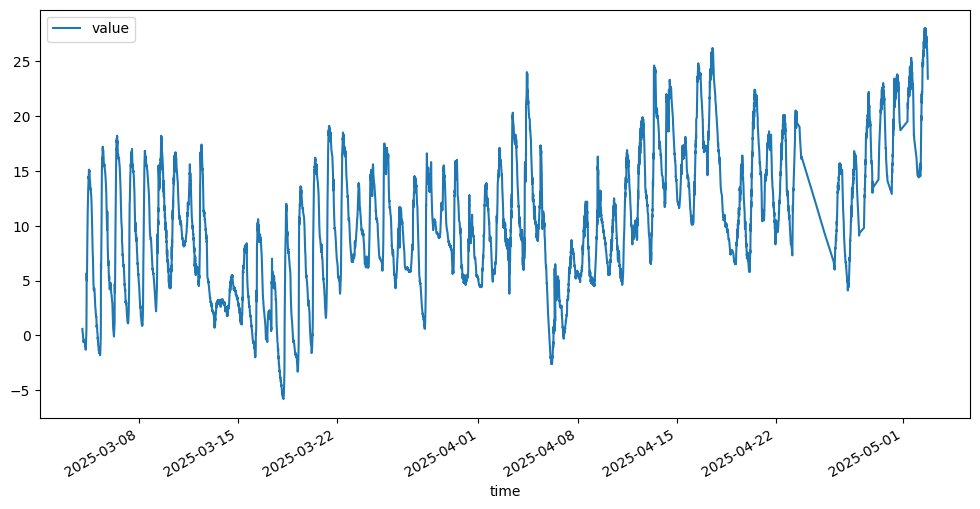

In [17]:
k = 25                               # 25-sample window
rolling_med = df_meteo_temp['value'].rolling(k, center=True, min_periods=5).mean()
mad = (df_meteo_temp['value'] - rolling_med).abs().rolling(k, center=True, min_periods=5).mean()
print(mad[300:305])
print(rolling_med[300:305])
print(mad.unique())
threshold = 3 * 1.4826 * mad         # 3 × MAD ~ 3 σ for normal data
valid = rolling_med.notna() & mad.notna()
mask = ((df_meteo_temp['value'] - rolling_med).abs() < threshold) & valid
clean = df_meteo_temp[mask]
clean.plot(y='value', x='time', figsize=(12, 6))  # quick sanity check

clean_meteo_temp =  clean.copy()



print("outliers detected", len(df_meteo_temp) -len(clean))

### Joine the tables

In [18]:
df_tc = df_tc_stream[~df_tc_stream['time'].duplicated(keep=False)] 
df_meteo = df_meteo_temp[~df_meteo_temp['time'].duplicated(keep=False)] 

print("num of duplicated values in main stream", len(df_tc)-len(df_tc_stream))
print("num of duplicated values in temperatures from meteo station nearby", len(df_meteo)-len(df_meteo_temp))

num of duplicated values in main stream 0
num of duplicated values in temperatures from meteo station nearby 0


In [19]:



# ---------- 2.  Pre-sort by the key column ----------
df_tc_stream  = df_tc_stream.sort_values("time")
df_meteo_temp = clean_meteo_temp.sort_values("time")

# ---------- 3.  Nearest-timestamp _tc_stream join ----------
# • direction="nearest"   → pick the closest earlier OR later row
# • tolerance             → max allowed gap; adjust as needed
out = pd.merge_asof(
        df_tc_stream, df_meteo_temp,
        on="time",
        direction="nearest",
        tolerance=pd.Timedelta("20 min")   # e.g. 10-minute window
      )

# ---------- 4.  (Optional) tidy up ----------
# Rename the outdoor column to something readable
out = out.rename(columns={"value": "outdoor_temperature"})

# Keep a note of the delta so you can double-check it later
out["seconds_delta"] = (out["time"] - out["time"].shift()).dt.total_seconds()

# ---------- 5.  Save or continue analysis ----------
out.to_csv("joined_with_outdoor_temp.csv", index=False)


In [20]:
gap = pd.Timedelta('45min')

# Earlier (backward) neighbour ≤45 min away
temp_bwd = (
    pd.merge_asof(
        out[out['outdoor_temperature'].isna()][['time']],   # only missing rows
        df_meteo_temp.sort_values('time'),
        on='time',
        direction='backward',
        tolerance=gap
    )
    .rename(columns={'value': 'temp_bwd'})
)

# Later (forward) neighbour ≤45 min away
temp_fwd = (
    pd.merge_asof(
        out[out['outdoor_temperature'].isna()][['time']],   # only missing rows
        df_meteo_temp.sort_values('time'),
        on='time',
        direction='forward',
        tolerance=gap
    )
    .rename(columns={'value': 'temp_fwd'})
)

# ------------------------------------------------------------------
# 3.  Combine the two sides and compute the mean
# ------------------------------------------------------------------
tmp = temp_bwd.merge(temp_fwd, on='time', how='outer')

# Mean of the available sides (1 or 2 numbers).  If *both* sides are
# NaN, the result is NaN and we leave it missing.
tmp['imputed'] = tmp[['temp_bwd', 'temp_fwd']].mean(axis=1)
tmp['imputed'] = tmp['imputed'].where(tmp[['temp_bwd', 'temp_fwd']].notna().all(axis=1))

# ------------------------------------------------------------------
# 4.  Push the imputed values back into `out`
# ------------------------------------------------------------------
out = out.merge(tmp[['time', 'imputed']], on='time', how='left')
need_impute = out['outdoor_temperature'].isna() & out['imputed'].notna()
out.loc[need_impute, 'outdoor_temperature'] = out.loc[need_impute, 'imputed']

# (Optional) drop the helper column
out = out.drop(columns='imputed')

In [21]:
# Count the number of records in 'out' where 'outdoor_temperature' is NAN
nan_count = out['outdoor_temperature'].isna().sum()
print("Number of records with NAN in outdoor_temperature:", nan_count)


print("percentage of rows with NAN value : ", nan_count /len(out) *100 )

Number of records with NAN in outdoor_temperature: 3799
percentage of rows with NAN value :  5.763395837126039


In [22]:
data_f_model = out.dropna(subset=['outdoor_temperature'])


In [23]:
print(out.head())

                 time  temperature  prikon_tc0_rate  prikon_tc1_rate  \
0 2025-03-04 07:28:31          1.8         0.003333         0.000000   
1 2025-03-04 07:30:16          2.0         0.003333         0.001667   
2 2025-03-04 07:31:01          1.7         0.005000         0.001667   
3 2025-03-04 07:32:01          1.8         0.013333         0.000000   
4 2025-03-04 07:33:31          1.5         0.000000         0.000000   

   prikon_tc2_rate  prikon_tc3_rate  prikon_tc0_value  prikon_tc1_value  \
0         0.003333              0.0               5.0               0.0   
1         0.003333              0.0               5.0               6.3   
2         0.003333              0.0               5.0               6.3   
3         0.000000              0.0               5.3               0.0   
4         0.000000              0.0               0.0               0.0   

   prikon_tc2_value  prikon_tc3_value  ...  tl_tc3_value  fanh_tc0_rate  \
0               4.9               0.0  ..

### ***COMPUTE LABEL*** computing difference between actual temperature and the the said by TC

In [27]:
data_f_model["temperature_delta"] = data_f_model["outdoor_temperature"] - data_f_model["temperature"]


print(data_f_model.head())


data_w_label = data_f_model.drop(columns=["outdoor_temperature","seconds_delta"])




print(data_w_label.head())

df = data_w_label.copy()

                 time  temperature  prikon_tc0_rate  prikon_tc1_rate  \
0 2025-03-04 07:28:31          1.8         0.003333         0.000000   
1 2025-03-04 07:30:16          2.0         0.003333         0.001667   
2 2025-03-04 07:31:01          1.7         0.005000         0.001667   
3 2025-03-04 07:32:01          1.8         0.013333         0.000000   
4 2025-03-04 07:33:31          1.5         0.000000         0.000000   

   prikon_tc2_rate  prikon_tc3_rate  prikon_tc0_value  prikon_tc1_value  \
0         0.003333              0.0               5.0               0.0   
1         0.003333              0.0               5.0               6.3   
2         0.003333              0.0               5.0               6.3   
3         0.000000              0.0               5.3               0.0   
4         0.000000              0.0               0.0               0.0   

   prikon_tc2_value  prikon_tc3_value  ...  fanh_tc0_rate  fanh_tc1_rate  \
0               4.9               0.0  .

C:\Users\patri\AppData\Local\Temp\ipykernel_23332\1014344035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f_model["temperature_delta"] = data_f_model["outdoor_temperature"] - data_f_model["temperature"]


## MODELING

count    62117.000000
mean         0.630137
std          2.496284
min        -16.500000
25%         -0.600000
50%          0.600000
75%          1.700000
max         15.200000
Name: temperature_delta, dtype: float64
Root Mean Squared Error (RMSE): 2.5746
Mean Absolute Error (MAE): 1.8865


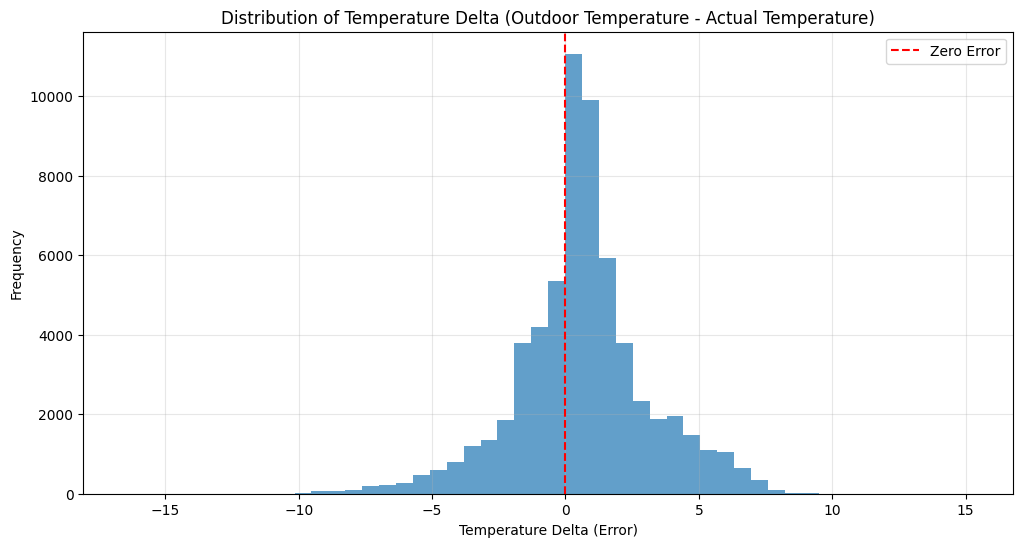

In [47]:
print(data_f_model["temperature_delta"].describe())

# Calculate RMSE and MAE for temperature_delta
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Since temperature_delta is already the error (difference between outdoor_temperature and temperature)
# We can calculate RMSE and MAE directly from these values
# RMSE = sqrt(mean(temperature_delta²))
rmse = np.sqrt(mean_squared_error(np.zeros(len(data_f_model["temperature_delta"])), 
                                 data_f_model["temperature_delta"]))

# MAE = mean(|temperature_delta|)
mae = mean_absolute_error(np.zeros(len(data_f_model["temperature_delta"])), 
                         data_f_model["temperature_delta"])

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Visualize the distribution of temperature_delta
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(data_f_model["temperature_delta"], bins=50, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', label='Zero Error')
plt.xlabel('Temperature Delta (Error)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature Delta (Outdoor Temperature - Actual Temperature)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


### XGBRegressor

#### Feature-engineering

-- already done this in pyflink 
nevím nakolik bych mohl dělat tady, rpotože 

In [29]:
NUMERIC_COLS = [
    "temperature",
    # Prikon rates and values
    "prikon_tc0_rate", "prikon_tc1_rate", "prikon_tc2_rate", "prikon_tc3_rate",
    "prikon_tc0_value", "prikon_tc1_value", "prikon_tc2_value", "prikon_tc3_value",
    # TL rates and values
    "tl_tc0_rate", "tl_tc1_rate", "tl_tc2_rate", "tl_tc3_rate",
    "tl_tc0_value", "tl_tc1_value", "tl_tc2_value", "tl_tc3_value",
    # Fanh rates and values
    "fanh_tc0_rate", "fanh_tc1_rate",
    "fanh_tc0_value", "fanh_tc1_value", "fanh_tc2_value", "fanh_tc3_value"
]

TARGET = "temperature_delta"
LAG_STEPS = [1, 2]              # past 2 observations as requested
ROLL_WINDOWS = [3, 6]           # past 3 / 6 rows mean

# Sort by time to ensure correct lag creation
if 'time' in df.columns:
    df = df.sort_values('time')

# create lag features
for col in NUMERIC_COLS:
    if col in df.columns:  # Only process columns that exist in the dataframe
        for lag in LAG_STEPS:
            df[f"{col}_lag{lag}"] = df[col].shift(lag)      # pandas shift for lags
        for win in ROLL_WINDOWS:
            df[f"{col}_roll{win}_mean"] = df[col].shift(1).rolling(win).mean()

# drop rows with NaNs introduced by shifting
df = df.dropna().reset_index(drop=True)

print(f"DataFrame shape after adding lag features: {df.shape}")
print(f"Number of features created: {df.shape[1] - len(NUMERIC_COLS) - 2}")  # -2 for time and target



DataFrame shape after adding lag features: (62111, 118)
Number of features created: 93


In [ ]:
# libraries
import numpy as np
import pandas as pd
from pathlib import Path
from joblib import dump, load                      # fast, numpy-aware persistence :contentReference[oaicite:0]{index=0}

from sklearn.metrics import mean_absolute_error, mean_squared_error
 # MAE for regression :contentReference[oaicite:1]{index=1}
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV  # CV that respects order :contentReference[oaicite:2]{index=2}
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor 


In [ ]:
# hold-out the newest 20 % for final test
test_size = int(len(df) * 0.20)
train_df, test_df = df.iloc[:-test_size], df.iloc[-test_size:]

X_train, y_train = train_df.drop(columns=[TARGET, "time"]), train_df[TARGET]
X_test,  y_test  = test_df.drop(columns=[TARGET, "time"]),  test_df[TARGET]

# numeric scaling (optional for XGBoost but helps if you try linear models later)
preproc = ColumnTransformer(
    [("scale", StandardScaler(), X_train.columns)],
    remainder="passthrough"
)                                                       

# base regressor with fast histogram grow policy
xgb = XGBRegressor(
    objective="reg:squarederror",
    tree_method="hist",          # CPU-fast; use "gpu_hist" if GPU
    eval_metric="mae",
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

pipe = Pipeline([
    ("prep", preproc),
    ("model", xgb)
])

# hyperparameter grid (very small demo grid; expand as needed)
param_grid = {
    "model__n_estimators": [400, 800],
    "model__max_depth":   [4, 6, 8],
    "model__min_child_weight": [1, 5],
}

tscv = TimeSeriesSplit(n_splits=5)                       

gcv = GridSearchCV(
    pipe,
    param_grid,
    cv=tscv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=2,
)

gcv.fit(X_train, y_train, 
        model__verbose=False)       


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scale',
                                                                         StandardScaler(),
                                                                         Index(['temperature', 'prikon_tc0_rate', 'prikon_tc1_rate', 'prikon_tc2_rate',
       'prikon_tc3_rate', 'prikon_tc0_value', 'prikon_tc1_value',
       'prikon_tc2_value'...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [4, 6, 8],
                         'model__min_child_weight': [1, 5],
                         'model__n_estimators': [400, 800]},
             scoring='neg_mean_absolute_error', verbose=2)

In [37]:
best_model = gcv.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test  MAE: {mae:.4f}")

print(best_model)

Test  MAE: 2.1573
Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  Index(['temperature', 'prikon_tc0_rate', 'prikon_tc1_rate', 'prikon_tc2_rate',
       'prikon_tc3_rate', 'prikon_tc0_value', 'prikon_tc1_value',
       'prikon_tc2_value', 'prikon_tc3_value', 'tl_tc0_rate',
       ...
       'fanh_tc1_value_roll3_mean', 'fanh_tc1_value_roll6_mean',
       'f...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None, min_chi

In [27]:
Path("models").mkdir(exist_ok=True)
dump(best_model, "models/deltaT_xgb.joblib")  

['models/deltaT_xgb.joblib']

In [36]:
### with Eval_metric RMSE because big mistake is more significant then small one

In [40]:
# hold-out the newest 20 % for final test
test_size = int(len(df) * 0.20)
train_df, test_df = df.iloc[:-test_size], df.iloc[-test_size:]

X_train, y_train = train_df.drop(columns=[TARGET, "time"]), train_df[TARGET]
X_test,  y_test  = test_df.drop(columns=[TARGET, "time"]),  test_df[TARGET]

# numeric scaling (optional for XGBoost but helps if you try linear models later)
preproc = ColumnTransformer(
    [("scale", StandardScaler(), X_train.columns)],
    remainder="passthrough"
)                                                       

# base regressor with fast histogram grow policy
xgb = XGBRegressor(
    objective="reg:squarederror",
    tree_method="hist",          # CPU-fast; use "gpu_hist" if GPU
    eval_metric="rmse",
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

pipe = Pipeline([
    ("prep", preproc),
    ("model", xgb)
])

# hyperparameter grid (very small demo grid; expand as needed)
param_grid = {
    "model__n_estimators": [200, 400,600, 1600],
    "model__max_depth":   [2,4, 6, 8],
    "model__min_child_weight": [1, 5],
}

tscv = TimeSeriesSplit(n_splits=5)                       

gcv2 = GridSearchCV(
    pipe,
    param_grid,
    cv=tscv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=2,
)

gcv2.fit(X_train, y_train, 
        model__verbose=False)       


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scale',
                                                                         StandardScaler(),
                                                                         Index(['temperature', 'prikon_tc0_rate', 'prikon_tc1_rate', 'prikon_tc2_rate',
       'prikon_tc3_rate', 'prikon_tc0_value', 'prikon_tc1_value',
       'prikon_tc2_value'...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [2, 4, 6, 8],
                         'model__min_child_weight': [1, 5],
                         'model__n_estimators': [200, 400, 600, 1600]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [44]:
best_model = gcv2.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test  MAE: {mae:.4f}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test  RMSE: {rmse:.4f}")

print(best_model)

Test  MAE: 2.1240
Test  RMSE: 2.7341
Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  Index(['temperature', 'prikon_tc0_rate', 'prikon_tc1_rate', 'prikon_tc2_rate',
       'prikon_tc3_rate', 'prikon_tc0_value', 'prikon_tc1_value',
       'prikon_tc2_value', 'prikon_tc3_value', 'tl_tc0_rate',
       ...
       'fanh_tc1_value_roll3_mean', 'fanh_tc1_value_roll6_mean',
       'f...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=2, max_l

In [ ]:
# Building a Lasso Regression model

# Import Lasso from sklearn
from sklearn.linear_model import Lasso

# Create a preprocessing pipeline similar to the XGBoost one
lasso_preproc = ColumnTransformer(
    [("scale", StandardScaler(), X_train.columns)],
    remainder="passthrough"
)

# Initialize the Lasso model with alpha (regularization strength)
# Alpha controls the amount of regularization - higher values mean more regularization
lasso = Lasso(
    alpha=0.1,  # Starting value, will be tuned
    max_iter=10000,  # Increase max iterations to ensure convergence
    random_state=42
)

# Create a pipeline with preprocessing and Lasso model
lasso_pipe = Pipeline([
    ("prep", lasso_preproc),
    ("model", lasso)
])

# Define hyperparameter grid for Lasso
lasso_param_grid = {
    "model__alpha": [0.001, 0.01, 0.1, 1.0, 10.0]  # Range of regularization strengths
}

# Use the same time series cross-validation
lasso_gcv = GridSearchCV(
    lasso_pipe,
    lasso_param_grid,
    cv=tscv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

# Fit the Lasso model
lasso_gcv.fit(X_train, y_train)

# Print the best parameters and score
print("Best Lasso parameters:", lasso_gcv.best_params_)
print("Best Lasso RMSE score:", -lasso_gcv.best_score_)

# Compare with XGBoost
print("\nXGBoost best RMSE score:", -gcv2.best_score_)

# Make predictions on test set
lasso_preds = lasso_gcv.predict(X_test)

# Evaluate the model
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))
lasso_mae = mean_absolute_error(y_test, lasso_preds)

print(f"\nLasso Test RMSE: {lasso_rmse:.4f}")
print(f"Lasso Test MAE: {lasso_mae:.4f}")




Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Lasso parameters: {'model__alpha': 1.0}
Best Lasso RMSE score: 2.235802903711101

XGBoost best RMSE score: 2.0563647215007346

Lasso Test RMSE: 3.2781
Lasso Test MAE: 2.4590


This could indicate an issue with model fitting or regularization strength.
Consider checking the alpha value and model convergence.
Best alpha value: 1.0
Number of non-zero coefficients: 0/116

XGBoost Feature Importance:
                         Feature  Importance
26        temperature_roll3_mean    0.079279
25              temperature_lag2    0.074134
0                    temperature    0.043464
27        temperature_roll6_mean    0.041581
98      fanh_tc1_rate_roll3_mean    0.037706
99      fanh_tc1_rate_roll6_mean    0.036103
114    fanh_tc3_value_roll3_mean    0.024883
24              temperature_lag1    0.024729
95      fanh_tc0_rate_roll6_mean    0.024675
47   prikon_tc0_value_roll6_mean    0.023659


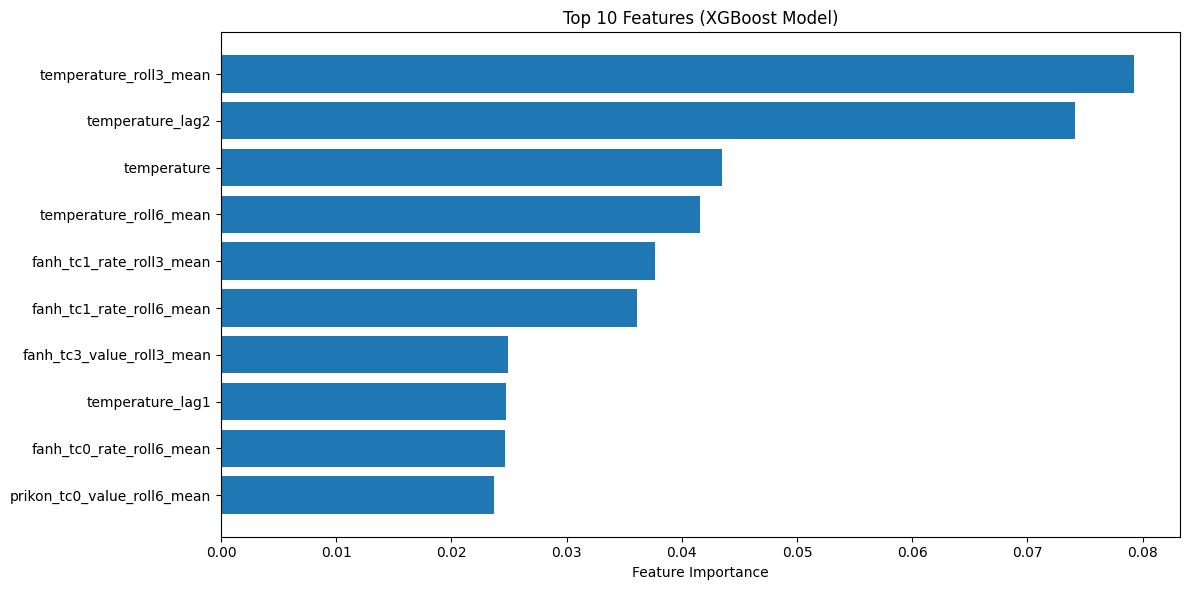

In [ ]:
# Extract feature importance from Lasso model
lasso_model = lasso_gcv.best_estimator_['model']
lasso_features = X_train.columns
lasso_importance = np.abs(lasso_model.coef_)

# Create a DataFrame to display feature importance
lasso_importance_df = pd.DataFrame({
    'Feature': lasso_features,
    'Importance': lasso_importance
})

# Sort by importance
lasso_importance_df = lasso_importance_df.sort_values('Importance', ascending=False)

# Check if all importances are zero
if np.all(lasso_importance == 0):
    print("All Lasso feature importances are zero!")
    print("This could indicate an issue with model fitting or regularization strength.")
    print("Consider checking the alpha value and model convergence.")
else:
    # Display the top features
    print("Lasso Feature Importance:")
    print(lasso_importance_df.head(10))

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    plt.barh(lasso_importance_df['Feature'][:10], lasso_importance_df['Importance'][:10])
    plt.xlabel('Absolute Coefficient Value')
    plt.title('Top 10 Features (Lasso Model)')
    plt.gca().invert_yaxis()  # Display the highest importance at the top
    plt.tight_layout()
    plt.show()

# Print alpha value for debugging
print(f"Best alpha value: {lasso_gcv.best_params_['model__alpha']}")
print(f"Number of non-zero coefficients: {np.sum(lasso_importance > 0)}/{len(lasso_importance)}")

# Compare with XGBoost feature importance if available
if hasattr(gcv2.best_estimator_['model'], 'feature_importances_'):
    xgb_importance = gcv2.best_estimator_['model'].feature_importances_
    xgb_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': xgb_importance
    }).sort_values('Importance', ascending=False)
    
    print("\nXGBoost Feature Importance:")
    print(xgb_importance_df.head(10))
    
    plt.figure(figsize=(12, 6))
    plt.barh(xgb_importance_df['Feature'][:10], xgb_importance_df['Importance'][:10])
    plt.xlabel('Feature Importance')
    plt.title('Top 10 Features (XGBoost Model)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
